In [50]:
import pandas as pd
import os
import numpy as np

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('12_months_city_bike.csv')

In [52]:
df['ride_length_seconds'] = df['ride_length'].dt.total_seconds()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699639 entries, 0 to 5699638
Data columns (total 12 columns):
 #   Column               Dtype          
---  ------               -----          
 0   ride_id              object         
 1   rideable_type        object         
 2   started_at           object         
 3   ended_at             object         
 4   start_station_name   object         
 5   start_station_id     object         
 6   end_station_name     object         
 7   end_station_id       object         
 8   member_casual        object         
 9   ride_length          timedelta64[ns]
 10  day_of_week          int64          
 11  ride_length_seconds  float64        
dtypes: float64(1), int64(1), object(9), timedelta64[ns](1)
memory usage: 521.8+ MB


In [54]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual', 'ride_length', 'day_of_week',
       'ride_length_seconds'],
      dtype='object')

In [55]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_week,ride_length_seconds
0,011C1903BF4E2E28,classic_bike,2023-09-23 00:27:50,2023-09-23 00:33:27,Halsted St & Wrightwood Ave,TA1309000061,Sheffield Ave & Wellington Ave,TA1307000052,member,0 days 00:05:37,1,337.0
1,87DB80E048A1BF9F,classic_bike,2023-09-02 09:26:43,2023-09-02 09:38:19,Clark St & Drummond Pl,TA1307000142,Racine Ave & Fullerton Ave,TA1306000026,member,0 days 00:11:36,1,696.0
2,7C2EB7AF669066E3,electric_bike,2023-09-25 18:30:11,2023-09-25 18:41:39,Financial Pl & Ida B Wells Dr,SL-010,Racine Ave & 15th St,13304,member,0 days 00:11:28,3,688.0
3,57D197B010269CE3,classic_bike,2023-09-13 15:30:49,2023-09-13 15:39:18,Clark St & Drummond Pl,TA1307000142,Racine Ave & Belmont Ave,TA1308000019,member,0 days 00:08:29,5,509.0
4,8A2CEA7C8C8074D8,classic_bike,2023-09-18 15:58:58,2023-09-18 16:05:04,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Fullerton Ave,TA1306000026,member,0 days 00:06:06,3,366.0


In [56]:
if not pd.api.types.is_timedelta64_dtype(df['ride_length']):
    # Convert 'ride_length' to timedelta if not already
    df['ride_length'] = pd.to_timedelta(df['ride_length'])

In [57]:
df['ride_length_seconds'] = df['ride_length'].dt.total_seconds()

In [58]:
mean_ride_length_seconds = df['ride_length_seconds'].mean()
mean_ride_length_seconds

1052.0191526059825

In [59]:
max_ride_length_seconds = df['ride_length_seconds'].max()
max_ride_length_seconds

93596.0

In [60]:
# Convert the mean and max ride lengths back to timedelta for readable format (HH:MM:SS)
mean_ride_length = pd.to_timedelta(mean_ride_length_seconds, unit='s')
max_ride_length = pd.to_timedelta(max_ride_length_seconds, unit='s')

In [61]:
mean_ride_length

Timedelta('0 days 00:17:32.019152606')

In [62]:
max_ride_length

Timedelta('1 days 01:59:56')

In [63]:
unique_member_casual = df['member_casual'].unique()
unique_member_casual

array(['member', 'casual'], dtype=object)

In [64]:
# Count occurrences of each unique value in the day_of_week column
day_of_week_counts = df['day_of_week'].value_counts()

# Display the counts
print(day_of_week_counts)

day_of_week
1    921532
5    852793
7    829503
6    823344
4    780257
2    756637
3    735573
Name: count, dtype: int64


In [65]:
mode_day_of_week = df['day_of_week'].mode()[0]
mode_day_of_week

1

In [66]:
casual_member_duration = df.pivot_table(
    index='member_casual',             # Rows
    values='ride_length',              # Values to aggregate
    aggfunc='mean'                     # Function to apply (mean in this case)
)

<Axes: xlabel='member_casual'>

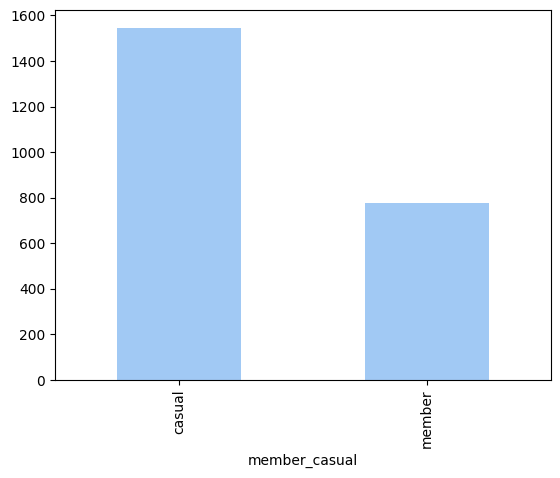

In [67]:
casual_member_duration['ride_length_seconds'] = casual_member_duration['ride_length'].dt.total_seconds()
casual_member_duration['ride_length_seconds'].plot(kind='bar')

In [68]:
casual_member_duration

,ride_length,ride_length_seconds
member_casual,,
casual,0 days 00:25:44.837422961,1544.837423
member,0 days 00:12:56.104096206,776.104096


In [69]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual', 'ride_length', 'day_of_week',
       'ride_length_seconds'],
      dtype='object')

In [70]:
day_duration = df.pivot_table(
    index='member_casual',          # Rows
    columns='day_of_week',         # Columns
    values='ride_length_seconds',          # Values to aggregate
    aggfunc='mean',                # Function to apply (mean in this case)
    fill_value=0                   # Fill missing values with 0 (optional)
)

In [71]:
day_duration.columns

Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='day_of_week')

In [72]:
day_duration.rename(columns={
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}, inplace=True)

In [73]:
day_duration

day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
member_casual,,,,,,,
casual,1712.054336,1806.881068,1492.290140,1325.132281,1374.984029,1350.543251,1509.469228
member,857.626675,865.578069,741.604032,743.879043,756.058492,742.903037,757.440984


In [74]:
day_duration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, casual to member
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sunday     2 non-null      float64
 1   Monday     2 non-null      float64
 2   Tuesday    2 non-null      float64
 3   Wednesday  2 non-null      float64
 4   Thursday   2 non-null      float64
 5   Friday     2 non-null      float64
 6   Saturday   2 non-null      float64
dtypes: float64(7)
memory usage: 128.0+ bytes


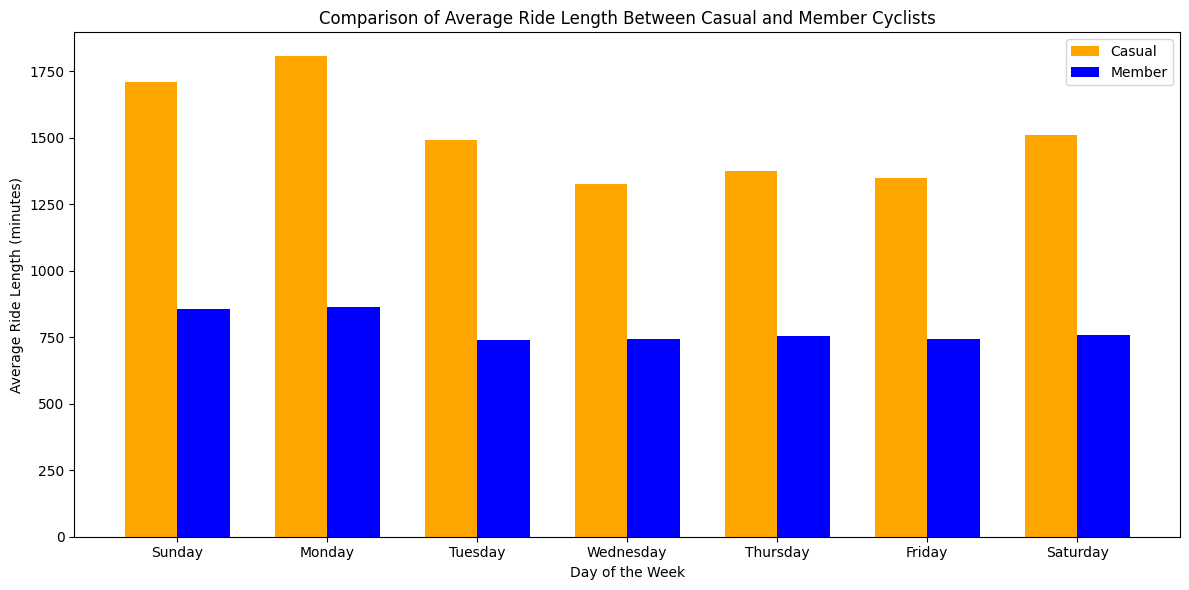

In [76]:
# Define the positions for the bars
x = np.arange(len(day_duration.columns))  # Number of days (7 days: Sunday to Saturday)
width = 0.35  # Width of the bars

# Split the data into casual and member data
casual_data = day_duration.loc['casual'].values
member_data = day_duration.loc['member'].values

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot bars for casual riders
plt.bar(x - width/2, casual_data, width, label='Casual', color='orange')

# Plot bars for member riders
plt.bar(x + width/2, member_data, width, label='Member', color='blue')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (minutes)')
plt.title('Comparison of Average Ride Length Between Casual and Member Cyclists')
plt.xticks(ticks=x, labels=day_duration.columns, rotation=0)  # Days of the week as x-axis labels

# Add legend and display plot
plt.legend()
plt.tight_layout()
plt.show()

In [83]:
week_days = ['Sunday','Monday','Tuesday','Wednesady','Thrusday','Friday','Saturday']
print('               Casual            |        Mamber')
for i in range(7):
    print(week_days[i] + ':    ' + str(casual_data[i]) + '    |   ' + str(member_data[i]))

               Casual            |        Mamber
Sunday:    1712.0543359126602    |   857.626675447025
Monday:    1806.8810684381915    |   865.5780686775792
Tuesday:    1492.2901395845875    |   741.6040322827849
Wednesady:    1325.1322812982928    |   743.8790433455608
Thrusday:    1374.9840290214095    |   756.0584922909093
Friday:    1350.5432507869593    |   742.9030370337314
Saturday:    1509.4692280701754    |   757.4409838281039


In [79]:
casual_data[0]

1712.0543359126602

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699639 entries, 0 to 5699638
Data columns (total 12 columns):
 #   Column               Dtype          
---  ------               -----          
 0   ride_id              object         
 1   rideable_type        object         
 2   started_at           object         
 3   ended_at             object         
 4   start_station_name   object         
 5   start_station_id     object         
 6   end_station_name     object         
 7   end_station_id       object         
 8   member_casual        object         
 9   ride_length          timedelta64[ns]
 10  day_of_week          int64          
 11  ride_length_seconds  float64        
dtypes: float64(1), int64(1), object(9), timedelta64[ns](1)
memory usage: 521.8+ MB


In [86]:
riders_by_day = df.pivot_table(
    index='member_casual',             # Rows
    columns='day_of_week',           # Columns
    values='ride_id',              # Values to aggregate
    aggfunc='count',                     # Function to apply (mean in this case)
    fill_value=0                # Null values
)

In [88]:
riders_by_day

day_of_week,1,2,3,4,5,6,7
member_casual,,,,,,,
casual,436548,346707,229266,221953,255122,251919,304209
member,484984,409930,506307,558304,597671,571425,525294


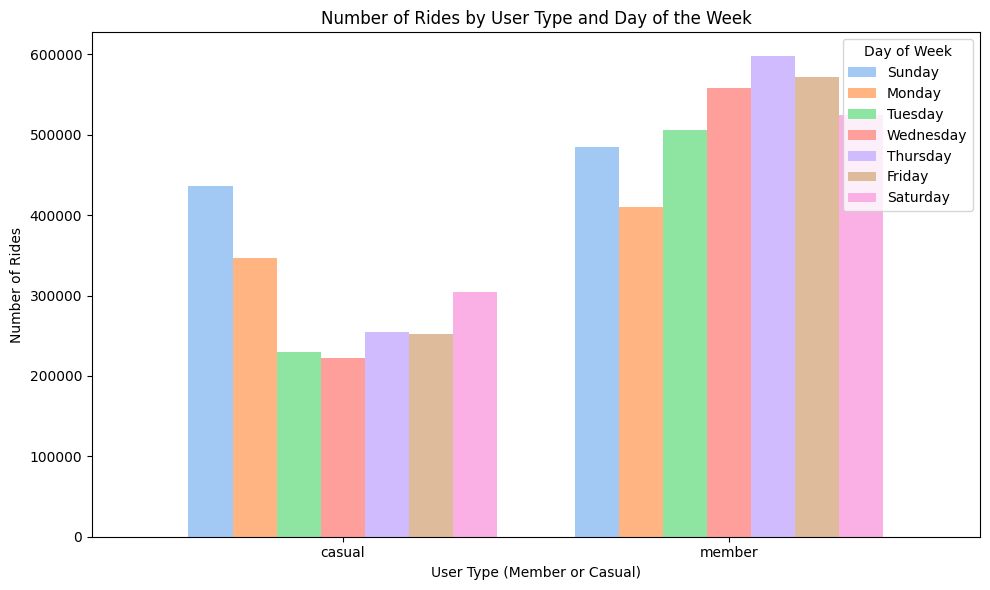

In [90]:
# Reset index to make it easier for plotting
riders_by_day = riders_by_day.reset_index()

# Visualizing the pivot table using a bar chart
riders_by_day.plot(kind='bar', x='member_casual', figsize=(10, 6), width=0.8)

# Set plot labels and title
plt.xlabel('User Type (Member or Casual)')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by User Type and Day of the Week')

# Customize x-ticks and legend
plt.xticks(rotation=0)
plt.legend(title='Day of Week', labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Show the plot
plt.tight_layout()
plt.show()